In [62]:
import numpy as np
import pandas as pd

import os

# import model related libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# import module to calculate model perfomance metrics
from sklearn import metrics

In [40]:
#data_path = "data/Advertising.csv" # or load the dataset directly from the link
#data_link = "http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv"

#Step 1: get the data (read the csv file)
path = r'C:\Users\14438\Downloads'
os.chdir(path)
data = pd.read_csv('Advertising.csv', index_col=0 , error_bad_lines = False)

In [41]:
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [42]:
data.reset_index(drop =True , inplace = True)

In [43]:
data.shape

(200, 4)

In [45]:
#Step 2: select independent(X) and dependent variable (y)
# create a Python list of feature names
feature_names=['Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_names]

# sales
y = data.Sales

In [46]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [48]:
# Step 3: Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.20)

In [49]:
y_test

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
171    14.5
18     11.3
11     17.4
89     16.7
110    13.4
118    15.9
159    12.9
35     12.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    14.9
38     10.1
28     18.9
193    19.6
27     15.9
47     23.2
165    11.9
194    17.3
177    11.7
176    20.2
97     15.5
174    11.5
73     11.0
69     22.3
172     7.6
Name: Sales, dtype: float64

In [50]:
# Step 4: Fit linear regression model to trainingset
# Linear Regression Model
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print("Intercept=",linreg.intercept_)
print("Slope=",linreg.coef_)

Intercept= 9.1341254885822
Slope= [0.20071881]


In [52]:
from sklearn.feature_selection import f_regression
fregression=f_regression(X_train, y_train) #returns Fvalues of features; p values of features
fregression

(array([74.61801398]), array([5.92023347e-15]))

In [55]:
#Step 5: Test the model's generalization ability using testset
# make predictions on the testing set
y_pred = linreg.predict(X_test)
y_pred

array([19.08977823, 13.61015485,  9.41513182, 11.16138542, 13.40943604,
       17.56431531, 15.47683974, 11.30188859, 12.34562637, 13.87108929,
       13.32914852, 13.248861  , 13.95137682, 18.72848438, 10.78001969,
       16.5406494 , 12.82735151,  9.95707259, 16.9621589 , 15.05533025,
       11.06102602, 16.48043376, 14.29259878, 11.94418876, 12.6266327 ,
       12.76713586, 14.49331759, 14.57360511, 17.56431531, 12.48612954,
       17.46395591,  9.81656943, 16.27971496, 10.69973217, 15.19583341,
       13.3492204 ,  9.81656943, 10.27822268, 17.94568104, 13.16857348])

In [56]:
# Step 6: Compute the performance of the model using metrics
print("RMSE=", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Rsquare=",metrics.r2_score(y_test,y_pred))

RMSE= 3.455522114906106
Rsquare= 0.35713855215895074


In [57]:
df_predicted=pd.DataFrame()
#df_predicted['Actual']=y_test
df_predicted['Predicted']=y_pred
df_predicted.head()

,Predicted
0,19.089778
1,13.610155
2,9.415132
3,11.161385
4,13.409436


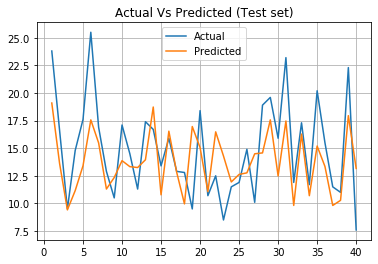

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x=np.arange(1,len(y_test)+1)

plt.plot(x,y_test,label='Actual')
plt.plot(x,y_pred,label='Predicted')
plt.title("Actual Vs Predicted (Test set)")
plt.legend(loc="best")
plt.grid(True)

In [59]:
import numpy as np
import pandas as pd

# import library for splitting data
from sklearn.model_selection import train_test_split

# import module to calculate model perfomance metrics
from sklearn import metrics

# Import libraries for Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [60]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [63]:
#data_path = "data/Advertising.csv" # or load the dataset directly from the link
#data_link = "http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv"

#Step 1: get the data (read the csv file)
path = r'C:\Users\14438\Downloads'
os.chdir(path)
data = pd.read_csv('Advertising.csv', index_col=0 , error_bad_lines = False)

In [71]:
# create a Python list of feature names
feature_names=['Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_names]

# sales
y = data.Sales



In [73]:
# Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.20)

In [74]:
# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_train_poly

array([[1.00000e+00, 4.00000e-01, 1.60000e-01],
       [1.00000e+00, 3.00000e-01, 9.00000e-02],
       [1.00000e+00, 1.21000e+01, 1.46410e+02],
       [1.00000e+00, 3.29000e+01, 1.08241e+03],
       [1.00000e+00, 2.81000e+01, 7.89610e+02],
       [1.00000e+00, 2.39000e+01, 5.71210e+02],
       [1.00000e+00, 4.68000e+01, 2.19024e+03],
       [1.00000e+00, 3.77000e+01, 1.42129e+03],
       [1.00000e+00, 4.51000e+01, 2.03401e+03],
       [1.00000e+00, 3.23000e+01, 1.04329e+03],
       [1.00000e+00, 4.23000e+01, 1.78929e+03],
       [1.00000e+00, 3.46000e+01, 1.19716e+03],
       [1.00000e+00, 1.60000e+01, 2.56000e+02],
       [1.00000e+00, 4.62000e+01, 2.13444e+03],
       [1.00000e+00, 2.00000e+01, 4.00000e+02],
       [1.00000e+00, 1.00000e+01, 1.00000e+02],
       [1.00000e+00, 5.40000e+00, 2.91600e+01],
       [1.00000e+00, 1.10000e+01, 1.21000e+02],
       [1.00000e+00, 8.60000e+00, 7.39600e+01],
       [1.00000e+00, 2.59000e+01, 6.70810e+02],
       [1.00000e+00, 1.43000e+01, 2.0449

In [75]:
# Linear Regression Model
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
# make predictions on the testing set
y_pred = linreg.predict(X_test_poly)
y_pred

array([19.20415539, 13.54981889,  9.48670638, 11.15005873, 13.35016359,
       17.59057038, 15.43187488, 11.28562695, 12.30079605, 13.81015931,
       13.27044915, 13.1908191 , 13.89044338, 18.81923729, 10.78339063,
       16.52485099, 12.77414587,  9.99864693, 16.96201519, 15.00290706,
       11.05338252, 16.46258884, 14.23259217, 11.9086586 , 12.57654757,
       12.714811  , 14.4345682 , 14.5155063 , 17.59057038, 12.43854259,
       17.48548153,  9.8655524 , 16.25539117, 10.70643996, 15.14563789,
       13.29036985,  9.8655524 , 10.3038335 , 17.99111055, 13.11127344])

In [80]:
# compute the RMSE of our predictions
print("RMSE=",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Rsquare=",metrics.r2_score(y_test,y_pred))

RMSE= 3.4530163214136684
Rsquare= 0.3580705641153773


In [81]:
df_predicted=pd.DataFrame()
df_predicted['Actual']=y_test
df_predicted['Predicted']=y_pred
df_predicted

,Actual,Predicted
59,23.8,19.204155
41,16.6,13.549819
35,9.5,9.486706
103,14.8,11.150059
185,17.6,13.350164
199,25.5,17.590570
96,16.9,15.431875
5,12.9,11.285627
30,10.5,12.300796
169,17.1,13.810159


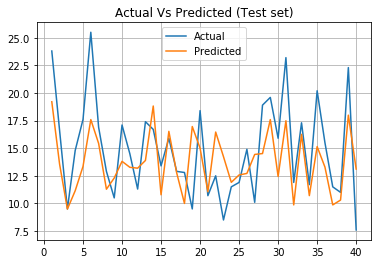

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x=np.arange(1,len(y_test)+1)

plt.plot(x,y_test,label='Actual')
plt.plot(x,y_pred,label='Predicted')
plt.title("Actual Vs Predicted (Test set)")
plt.legend(loc="best")
plt.grid(True)